In [175]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.metrics import mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
import pingouin as pg
from scipy.stats import chi2
from numpy.linalg import det
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [176]:
# Cargamos el CSV y lo inspeccionamos
df = pd.read_csv('credit_risk_data-1.csv')
df.head()


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [177]:
# Imprimimos estadisticas descriptivas
df.describe()

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,6.023200,0.265600
std,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,3.205397,0.441741
min,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,0.000000,0.000000
25%,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,3.600000,0.000000
50%,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,5.900000,0.000000
75%,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,8.400000,1.000000
max,500000.000000,149929.960000,19.300000,0.999000,850.000000,0.998000,1.000000,11.000000,0.979000,0.893000,1000000.000000,75.000000,16.400000,1.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

In [179]:
# Vemos cuanto duran los datos
date = df.application_date
print("Rango de fechas: {} a {}".format(date.min(), date.max()))

Rango de fechas: 2022-01-01 a 2024-12-29


In [180]:
# Contamos los NaN por columna
df.isna().sum()

application_id           0
application_date         0
loan_amount              0
annual_income            0
employment_years         0
job_stability_score      0
credit_score             0
credit_utilization       0
payment_history_score    0
open_credit_lines        0
debt_to_income_ratio     0
savings_ratio            0
asset_value              0
age                      0
education_level          0
marital_status           0
residential_stability    0
loan_status              0
dtype: int64

Al contrario de lo indicado en el diuccionario de datos, los datos no tienen NaNs. Vemos que estan ordenados por fecha y no por ID, y los IDs no parecen seguir un orden. Los datos tienen escalas muy diferentes.

Ahora vamos a ver diferencias entre cada clase:

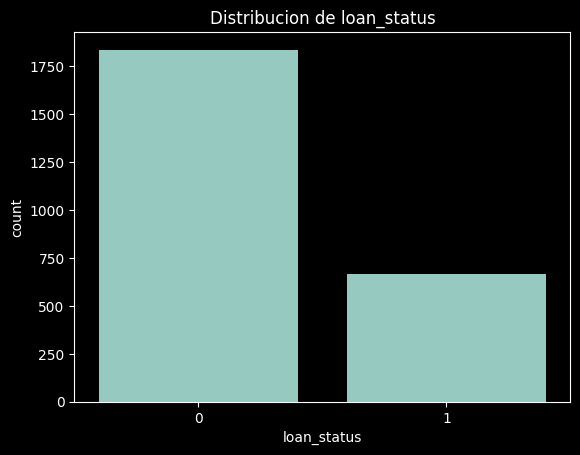

loan_status
0    0.7344
1    0.2656
Name: count, dtype: float64


In [181]:
# Ploteamos la distribucion de la variable target (loan_status)
sns.countplot(x='loan_status', data=df)
plt.title('Distribucion de loan_status')
plt.show()

print(df['loan_status'].value_counts()/len(df))

In [182]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Dividimos en train y test con stratificacion por imbalance de clases
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

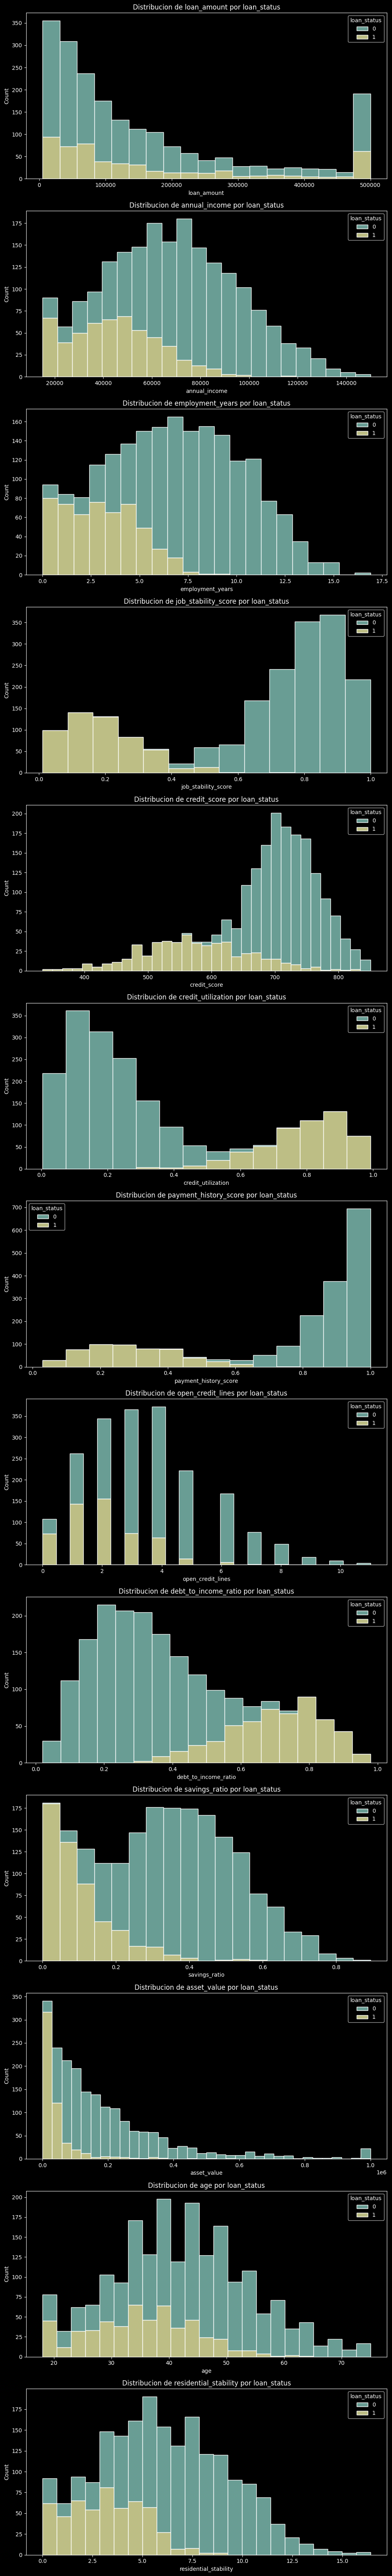

In [183]:
default = X_train[y_train == 1]
no_default = X_train[y_train == 0]

# Ploteamos las variables categoriales
categorial_cols = [X_train.columns[i] for i in range(len(X_train.columns)) if X_train.dtypes.iloc[i] == 'object']
numerical_cols = [X_train.columns[i] for i in range(len(X_train.columns)) if X_train.dtypes.iloc[i] != 'object']

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=X_train, x=col, hue=y_train, multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribucion de {col} por loan_status')

plt.tight_layout()
plt.show()

En los plots podemos ver que hay una separacion clara entre las clases. Esta separacion es mas pronunicada en algunas variable que en otras, por ejemplo, annual income, employment years, debt to income ratio, asset value, y residential stability

In [184]:
# Cuantificamos diferencias en variables numericas con informacion mutua
# y las ordenamos por mas diferencia

def mutual_info_numeric(feature, target, bins=10):
    # Discretizamos la variable numerica
    discretized_feature = pd.cut(feature, bins=bins, labels=False)
    return mutual_info_score(discretized_feature, target)

mi_scores = {}
for col in numerical_cols:
    mi = mutual_info_numeric(X_train[col], y_train)
    mi_scores[col] = mi
mi_scores = dict(sorted(mi_scores.items(), key=lambda item: item[1], reverse=True))
print("Información mutua de variables numéricas con loan_status: (mayor indica una variable más relevante)")
for col, score in mi_scores.items():
    print(f"{col}: {score}")

Información mutua de variables numéricas con loan_status: (mayor indica una variable más relevante)
job_stability_score: 0.5474774855691926
payment_history_score: 0.5391521153706437
credit_utilization: 0.5233458874838277
debt_to_income_ratio: 0.38475473159746154
savings_ratio: 0.34221295044913796
credit_score: 0.32343733066124813
employment_years: 0.259602918753831
residential_stability: 0.18277928964996618
asset_value: 0.17035759760720026
annual_income: 0.15015299975271235
open_credit_lines: 0.11303732035700223
age: 0.0726760701384924
loan_amount: 0.004180335920756801


In [185]:
# Analizamos la importancia de las variables categoriales con informacion mutua
def mutual_info_categorical(feature, target):
    return mutual_info_score(feature, target)

mi_cat_scores = {}
for col in categorial_cols:
    mi = mutual_info_categorical(X_train[col], y_train)
    mi_cat_scores[col] = mi
mi_cat_scores = dict(sorted(mi_cat_scores.items(), key=lambda item: item[1], reverse=True))
print("\nInformación mutua de variables categóricas con loan_status: (mayor indica una variable más relevante)")
for col, score in mi_cat_scores.items():
    print(f"{col}: {score}")


Información mutua de variables categóricas con loan_status: (mayor indica una variable más relevante)
application_id: 0.5787314870026345
application_date: 0.27231834411489797
education_level: 0.073048561749895
marital_status: 0.043914840193573085


In [186]:
# Probamos normalidad multivariante en las variables numericas
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()


Del analis de informacion mutua podemos ver que la cantidad que se pide casi no tiene importancia para decidir si el prestamo se va a pagar. Vemos tambien que los fatcores con potencial importancia mayor son job stability score, payment history score, y credit utilizaiton.

Podemos ver, extrañamente, que aplication_id tiene informacion mutua moderada con la variable objetivo.

## Preprocesamiento


### Feature engineering

Vamos a crear algunas features combinadas

Las features que vamos a crear son

- loan_amount / asset_value
- loan_amount / income
- employment_years * job_stability_score
- employment_years / age
- job_stability_score / age

Esto basandonos en relaciones esperadas entre las variables,
y con el objetivo de mejorar la presicion del modelo.

In [187]:
# Creamos las nuevas features basadas en combinaciones de las existentes
def feature_engineering(df):
    df = df.copy()
    df['loan_over_assets'] = df['loan_amount'] / df['asset_value']
    df['loan_over_income'] = df['loan_amount'] / df['annual_income']
    df['employment_stability'] = df['employment_years'] * df['job_stability_score']
    df['employment_over_age'] = df['employment_years'] / df['age']
    df['stability_over_age'] = df['job_stability_score'] / df['age']
    return df

X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2082 to 1373
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2000 non-null   object 
 1   application_date       2000 non-null   object 
 2   loan_amount            2000 non-null   float64
 3   annual_income          2000 non-null   float64
 4   employment_years       2000 non-null   float64
 5   job_stability_score    2000 non-null   float64
 6   credit_score           2000 non-null   int64  
 7   credit_utilization     2000 non-null   float64
 8   payment_history_score  2000 non-null   float64
 9   open_credit_lines      2000 non-null   int64  
 10  debt_to_income_ratio   2000 non-null   float64
 11  savings_ratio          2000 non-null   float64
 12  asset_value            2000 non-null   float64
 13  age                    2000 non-null   int64  
 14  education_level        2000 non-null   object 
 15  marita

### Limpiamos los datos y los transformamos

In [188]:
# Eliminamos application id y application date
categorial_cols.remove('application_id')
categorial_cols.remove('application_date')

In [189]:
# Pipeline de preprocesamiento

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorial_cols)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## Suposiciones estdisticas:



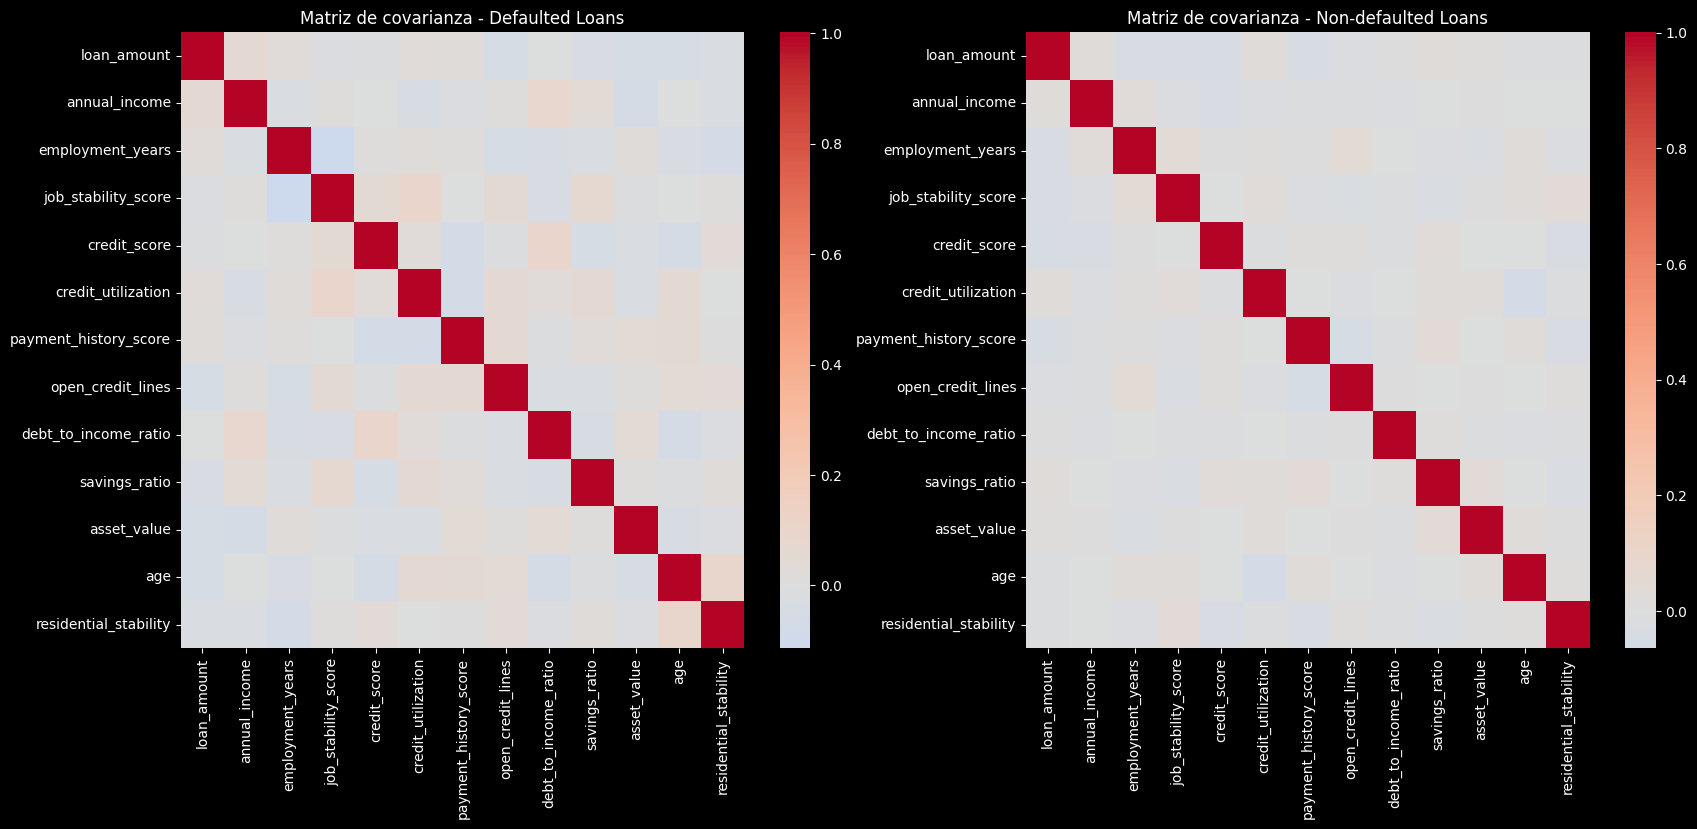

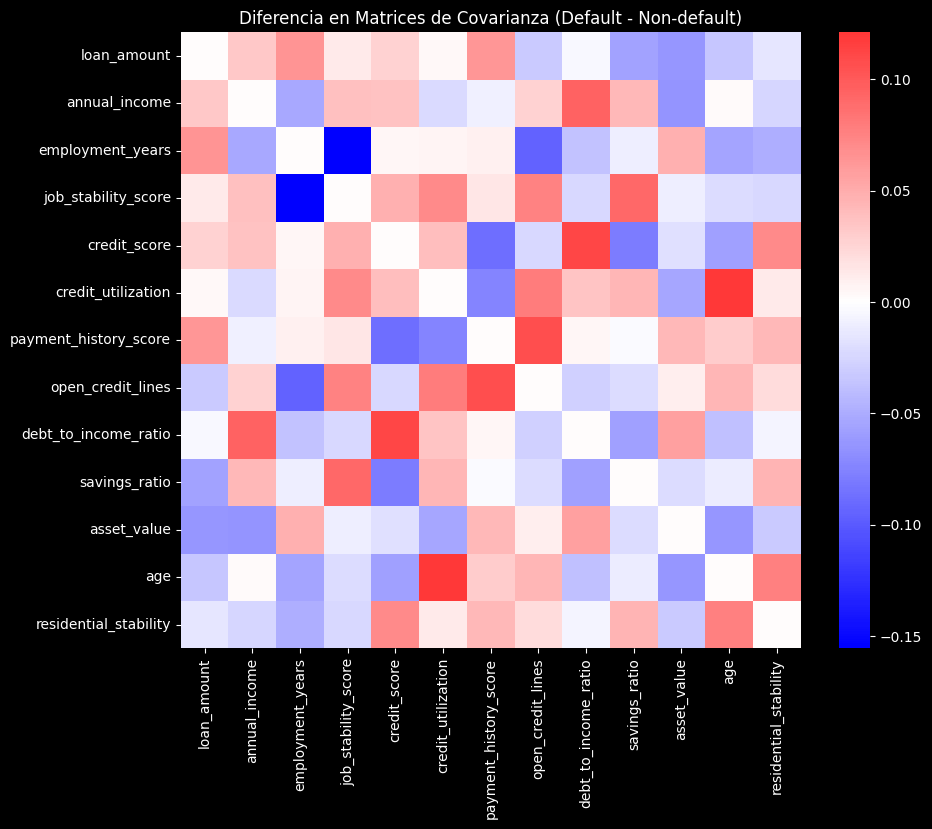

In [190]:
# Analizamos las matrices de covarianza para cada clase
# Escalamos las variables numéricas antes de calcular las matrices de correlación
scaler = StandardScaler()
default_scaled = pd.DataFrame(scaler.fit_transform(default[numerical_cols]), columns=numerical_cols)
no_default_scaled = pd.DataFrame(scaler.fit_transform(no_default[numerical_cols]), columns=numerical_cols)

# Calculamos las matrices de covarianza
cov_default = default_scaled.cov()
cov_no_default = no_default_scaled.cov()

# Ploteamos en grid
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(cov_default, ax=axes[0], cmap='coolwarm', center=0)
axes[0].set_title('Matriz de covarianza - Defaulted Loans')
sns.heatmap(cov_no_default, ax=axes[1], cmap='coolwarm', center=0)
axes[1].set_title('Matriz de covarianza - Non-defaulted Loans')
plt.show()

# Comparamos las dos matrices restando
cov_diff = cov_default - cov_no_default
plt.figure(figsize=(10, 8))
sns.heatmap(cov_diff, cmap='bwr', center=0)
plt.title('Diferencia en Matrices de Covarianza (Default - Non-default)')
plt.show()

In [191]:
# Probamos normalidad multivariante con test de Mardia
from scipy.stats import chi2
from numpy.linalg import det
def mardia_test(data):
    n, p = data.shape
    mean = data.mean(axis=0)
    centered = data - mean
    cov = np.cov(centered, rowvar=False)
    cov_inv = np.linalg.inv(cov)
    mardia_kurtosis = (n * (n + 1) * det(cov) ** (1 / p)) / (p * (p + 2))
    chi2_stat = chi2.ppf(0.95, df=p * (p + 1) / 2)
    return mardia_kurtosis, chi2_stat

kurt_default, chi2_default = mardia_test(default_scaled)
kurt_no_default, chi2_no_default = mardia_test(no_default_scaled)

print(f"Mardia Kurtosis Defaulted Loans: {kurt_default}, Chi2 Critical Value: {chi2_default}")
print(f"Mardia Kurtosis Non-defaulted Loans: {kurt_no_default}, Chi2 Critical Value: {chi2_no_default}")
if kurt_default < chi2_default:
    print("Los datos de préstamos en default siguen una distribución normal multivariante.")
else:
    print("Los datos de préstamos en default NO siguen una distribución normal multivariante.")
if kurt_no_default < chi2_no_default:
    print("Los datos de préstamos no en default siguen una distribución normal multivariante.")
else:
    print("Los datos de préstamos no en default NO siguen una distribución normal multivariante.")

Mardia Kurtosis Defaulted Loans: 1434.4315166404776, Chi2 Critical Value: 114.26786767719355
Mardia Kurtosis Non-defaulted Loans: 11047.931008115404, Chi2 Critical Value: 114.26786767719355
Los datos de préstamos en default NO siguen una distribución normal multivariante.
Los datos de préstamos no en default NO siguen una distribución normal multivariante.


Podemos observar que los datos no siguen una distribución normal multivarada, y que las matrices de covarianza no son iguales.

Sin embargo, procederemos con el analisis con LDA y QDA como fue requerido.

## Modelo
Vamos a probar LDA y QDA

In [192]:
# Probmos el LDA

# Sin feature engineering
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Metricas
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

print("Métricas en Train:")
print(classification_report(y_train, y_train_pred))
print("Métricas en Test:")
print(classification_report(y_test, y_test_pred))

Métricas en Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1469
           1       1.00      1.00      1.00       531

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Métricas en Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [193]:
## QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Metricas
y_train_pred = qda.predict(X_train)
y_test_pred = qda.predict(X_test)
print("Métricas en Train:")
print(classification_report(y_train, y_train_pred))
print("Métricas en Test:")
print(classification_report(y_test, y_test_pred))

Métricas en Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1469
           1       1.00      1.00      1.00       531

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Métricas en Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



/home/marcos/Desktop/LDA/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/marcos/Desktop/LDA/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


### Analisis
Podemos observar que los odelos LDA y QDA alcanzan una puntuacion perfecta en nuestra tarea de clasificacion, includo despues de revisar el procedimient y no encontrar data leakage. Esto puede suceder si los datos son perfectamente linealmente separables, o si la variable target fue creada a partir de las otras features.

Podemos asumir que el modelo si va a generalizar a otros datos con esta presicion alta.
En caso contrario, se podrian considerar medidas para alcanzar el balance deseado enter Presicion y Recall basandose en las necesidades del negocio (es decir, pierden mas dinero con falsos positivos que con falsos negativos, como fue especificado).

## Interpretabilidad

In [194]:
# Coeficientes del LDA
coef_df = pd.DataFrame({
    'Feature': numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorial_cols)),
    'Coefficient': lda.coef_[0]
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)

                        Feature  Coefficient
5            credit_utilization    11.767166
8          debt_to_income_ratio     4.471488
16  education_level_High School     2.698936
20        marital_status_Single     1.111323
21       marital_status_Widowed     0.698221
18      marital_status_Divorced    -0.188453
13   education_level_Associates    -0.273153
11                          age    -0.357359
0                   loan_amount    -0.408768
17      education_level_Masters    -0.549204
14    education_level_Bachelors    -0.682655
19       marital_status_Married    -0.902559
15    education_level_Doctorate    -1.185948
10                  asset_value    -1.223850
7             open_credit_lines    -1.276691
1                 annual_income    -1.585538
12        residential_stability    -1.699571
2              employment_years    -2.368588
9                 savings_ratio    -2.994385
4                  credit_score    -3.982636
3           job_stability_score   -13.050045
6         

In [195]:
# QDA no tiene coeficientes lineales como LDA, pero podemos analizar las varianzas por clase

# Obtenemos las feature names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorial_cols))

# Para QDA, analizamos las medias por clase y las varianzas
qda_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Mean Class 0': qda.means_[0],
    'Mean Class 1': qda.means_[1],
    'Mean Difference': qda.means_[1] - qda.means_[0]
})

qda_analysis = qda_analysis.sort_values(by='Mean Difference', ascending=False)

print("Análisis de QDA - Diferencias en medias por clase:")
print(qda_analysis)

Análisis de QDA - Diferencias en medias por clase:
                        Feature  Mean Class 0  Mean Class 1  Mean Difference
5            credit_utilization     -0.543973      1.504889         2.048861
8          debt_to_income_ratio     -0.472306      1.306624         1.778930
16  education_level_High School      0.105514      0.367232         0.261718
20        marital_status_Single      0.178353      0.372881         0.194529
13   education_level_Associates      0.204221      0.340866         0.136646
18      marital_status_Divorced      0.151804      0.231638         0.079834
0                   loan_amount     -0.017643      0.048809         0.066452
21       marital_status_Widowed      0.054459      0.107345         0.052886
15    education_level_Doctorate      0.093941      0.016949        -0.076992
17      education_level_Masters      0.212389      0.086629        -0.125760
14    education_level_Bachelors      0.383935      0.188324        -0.195611
19       marital_status_M

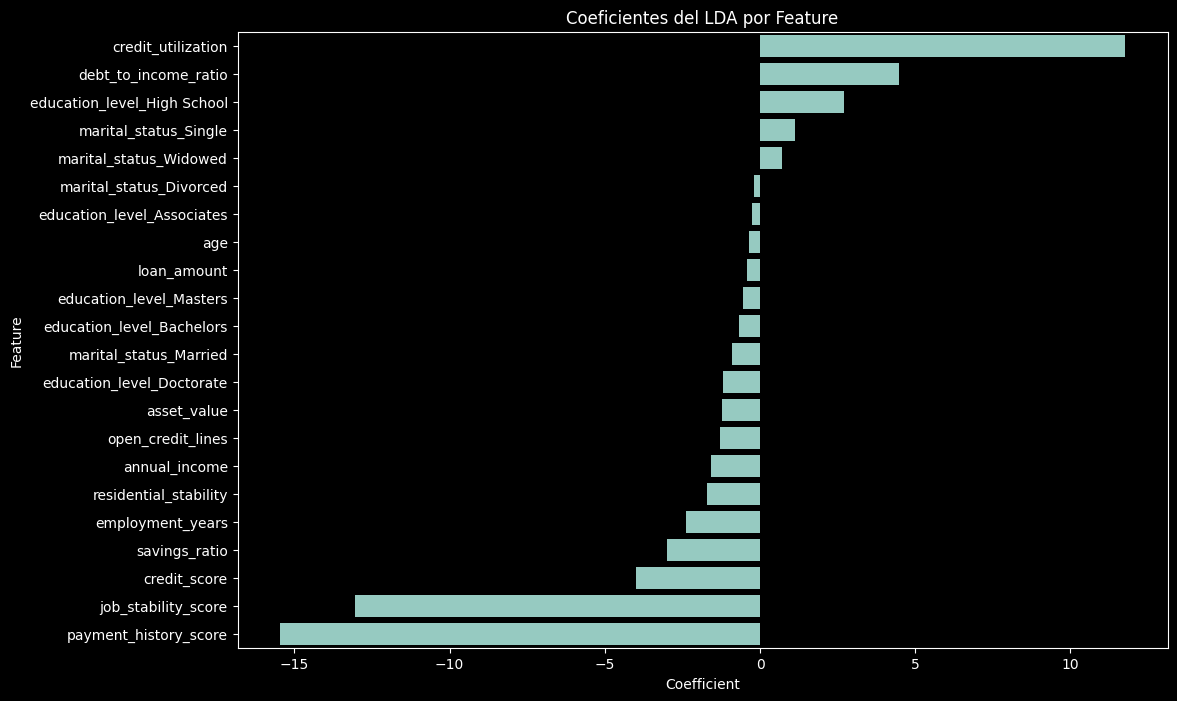

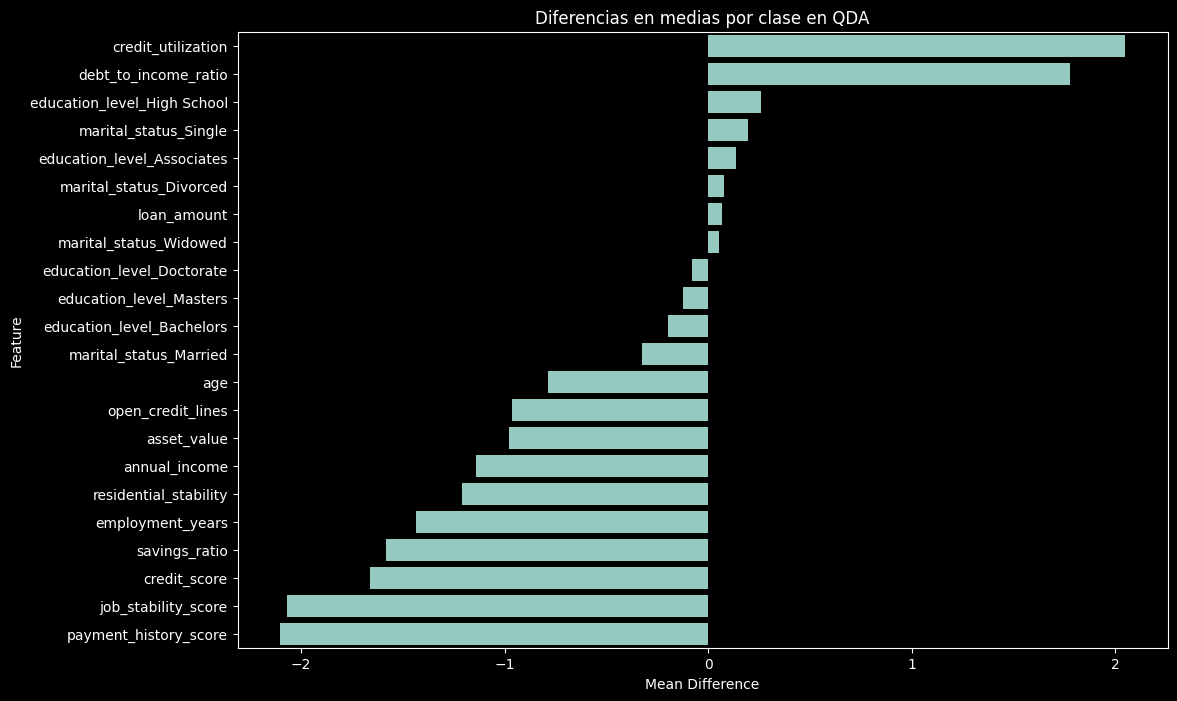

In [196]:
# Plots de interpretabilidad

# Coeficientes del LDA
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coeficientes del LDA por Feature')
plt.show()

# Análisis de QDA - Diferencias en medias por clase
plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Difference', y='Feature', data=qda_analysis)
plt.title('Diferencias en medias por clase en QDA')
plt.show()

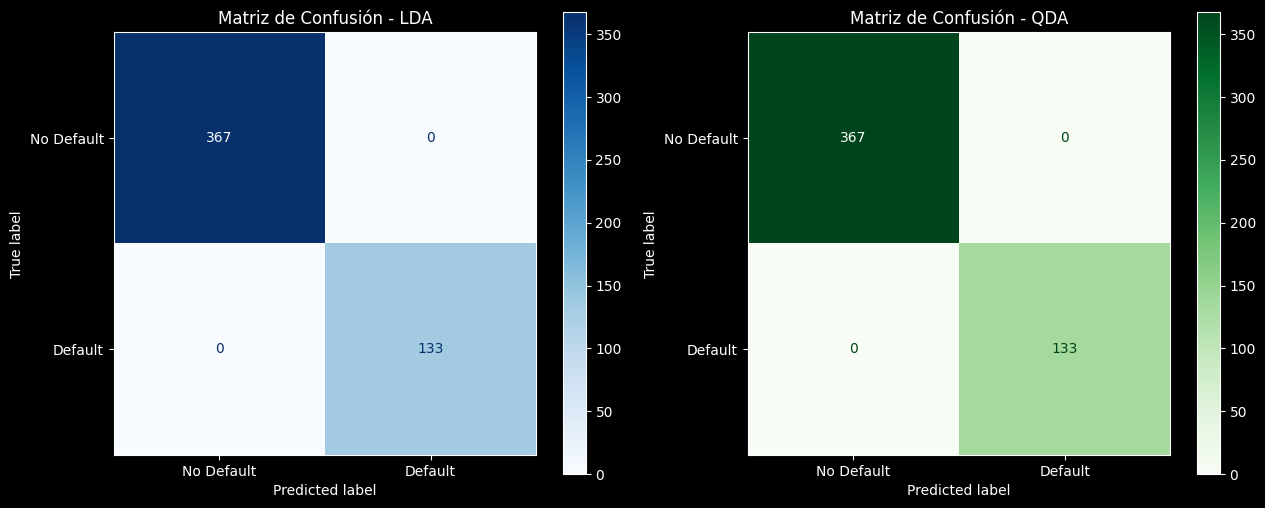

In [197]:
# Matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ConfusionMatrixDisplay.from_estimator(lda, X_test, y_test, ax=axes[0], cmap='Blues', display_labels=['No Default', 'Default'])
axes[0].set_title('Matriz de Confusión - LDA')
ConfusionMatrixDisplay.from_estimator(qda, X_test, y_test, ax=axes[1], cmap='Greens', display_labels=['No Default', 'Default'])
axes[1].set_title('Matriz de Confusión - QDA')
plt.show()

/home/marcos/Desktop/LDA/.venv/lib/python3.12/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/home/marcos/Desktop/LDA/.venv/lib/python3.12/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


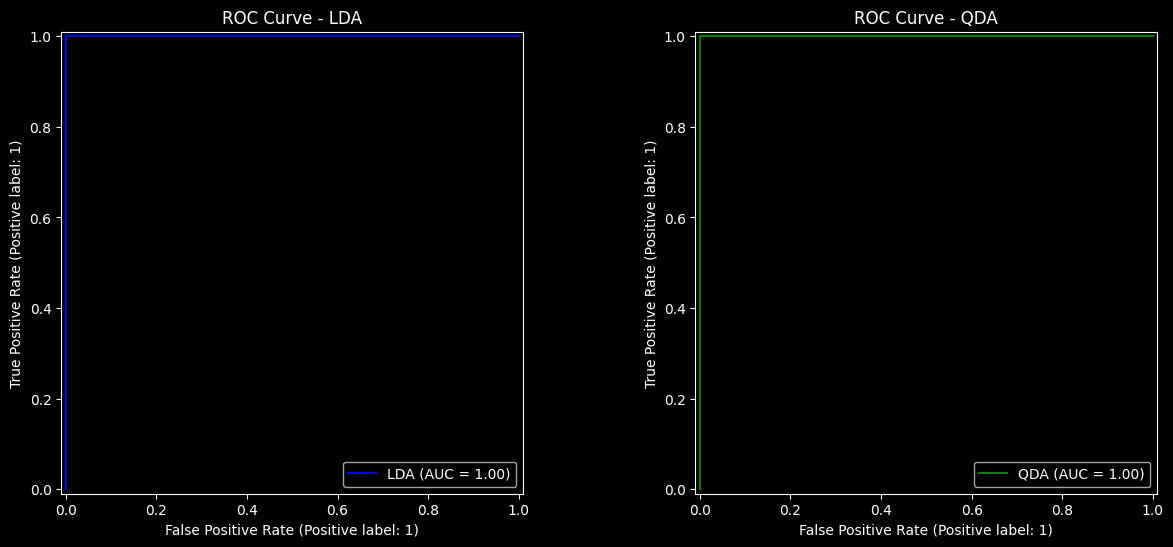

In [198]:
# ROC Curves
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
RocCurveDisplay.from_estimator(lda, X_test, y_test, ax=axes[0], name='LDA', color='blue')
axes[0].set_title('ROC Curve - LDA')
RocCurveDisplay.from_estimator(qda, X_test, y_test, ax=axes[1], name='QDA', color='green')
axes[1].set_title('ROC Curve - QDA')
plt.show()

## Seleccion de Modelo

Dado que ambos modelos alcanzan presicion perfecta, seleccionamos el LDA como el mejor, dado que es el mas simple. Usar modelos simples tiene varias ventajas, entre ellas esta menor costo computacional y menor probabilidad de overfitting.